In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, train_test_split

def MAPE(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [ ]:
def Seq(data, n_step):
    _X, _y = list(), list()
    if len(data)-1>n_step:
        for i in range(len(data)):
            end_ix = i + n_step
            if end_ix > len(data)-1:
                break
            seq_x = data[i:end_ix]
            seq_y = data[end_ix]

            _X.append(seq_x)
            _y.append(seq_y)
    return np.array(_X), np.array(_y)

In [ ]:
df = pd.read_csv('drive/MyDrive/TA/data1hari.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,pt,datetime
0,2.508785,2021-05-02
1,3.382674,2021-05-03
2,4.070660,2021-05-04
3,3.149583,2021-05-05
4,3.014722,2021-05-06
...,...,...
152,1.415382,2021-10-01
153,1.252292,2021-10-02
154,1.371875,2021-10-03
155,1.256701,2021-10-04


In [ ]:
new_data_1week = []

for i in range (0, len(df)-1, 7):
  new_data_1week.append(np.mean(df.pt[i:i+7]))
pd.DataFrame(data={'data': new_data_1week})

,data
0,3.134544
1,2.445833
2,3.440233
3,3.814147
4,4.356587
5,4.416652
6,3.141677
7,2.848953
8,3.463304
9,3.843249


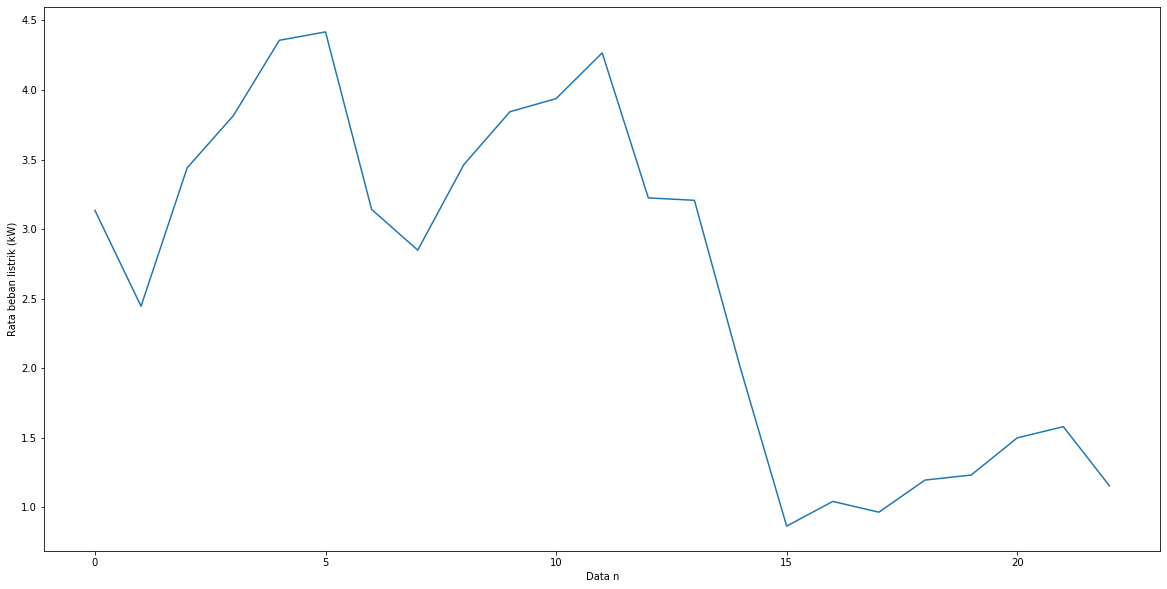

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(new_data_1week)
plt.xlabel('Data n')
plt.ylabel('Rata beban listrik (kW)')
plt.show()

In [ ]:
model = []
model = SVR()

In [ ]:
X, y = Seq(data = new_data_1week, n_step = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, shuffle=False)

In [ ]:
C = [.5, 1., 1.5, 2, 2.5]
epsilon = [.1, .2, .3, .4, .5, .6, .7, .8]
gamma = ['auto','scale', .01, .1, 1, 10]

parameter = {
    'kernel':['linear','rbf',],
    'C':C, 
    'gamma':gamma,
    'epsilon':epsilon
}

In [ ]:
GridSearch = GridSearchCV(model, parameter, scoring='neg_mean_squared_error')
GridSearch.fit(X_train, y_train)
GridSearch.best_params_

{'C': 2.5, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
GridSearch.score(X_test, y_test)

-0.11671100734895162

##Pengaruh Kernel##

In [ ]:
model = []
model = SVR()

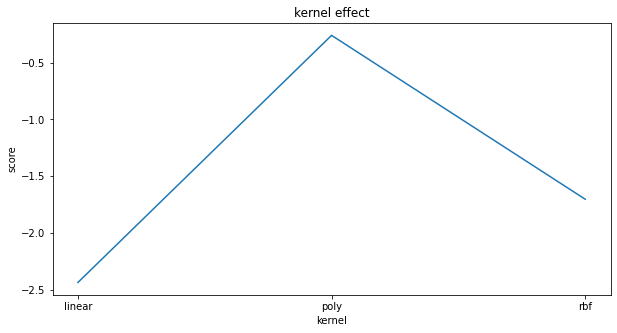

In [ ]:
kernel = ['linear', 'poly', 'rbf']
scores = []
for k in kernel:
  model.set_params(kernel=k)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize = (10,5))
plt.plot(kernel, scores)
plt.title("kernel effect")
plt.xlabel("kernel")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={'Kernel':kernel, 'Score':scores}).sort_values('Score')

,Kernel,Score
0,linear,-2.436666
2,rbf,-1.703746
1,poly,-0.260529


##Pengaruh nilai epsilon##


In [ ]:
model = []
model = SVR(kernel='poly')

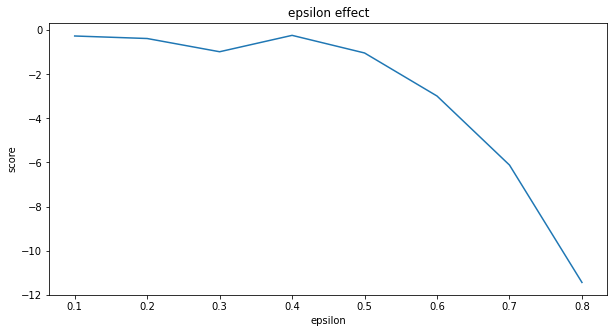

In [ ]:
epsilon = [0.1, .2, .3, .4, .5, .6, .7, .8]
scores = []
for e in epsilon:
  model.set_params(epsilon=e)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.plot(epsilon, scores)
plt.title("epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={'Epsilon':epsilon, 'score':scores}).sort_values('score')

,Epsilon,score
7,0.8,-11.445337
6,0.7,-6.118040
5,0.6,-2.985155
4,0.5,-1.031449
2,0.3,-0.975256
1,0.2,-0.374911
0,0.1,-0.260529
3,0.4,-0.231639


##Pengaruh C##

In [ ]:
model = []
model = SVR(kernel='poly', epsilon=.4)

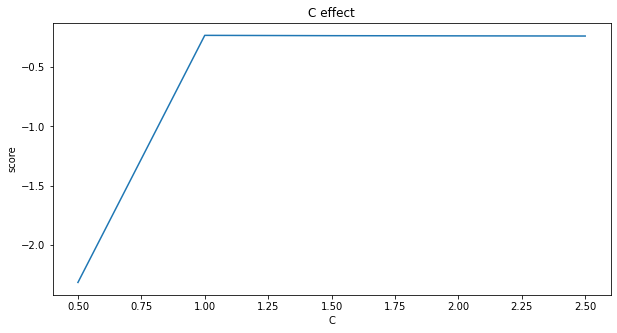

In [ ]:
C = [.5, 1., 1.5, 2, 2.5]
scores = []
for c in C:
  model.set_params(C=c)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(C, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={'C':C, 'Score':scores}).sort_values('Score')

,C,Score
0,0.5,-2.318857
4,2.5,-0.237350
3,2.0,-0.235863
2,1.5,-0.234370
1,1.0,-0.231639


##Pengaruh Gamma##

In [ ]:
model = []
model = SVR(C = 1, kernel='poly', epsilon=.4)

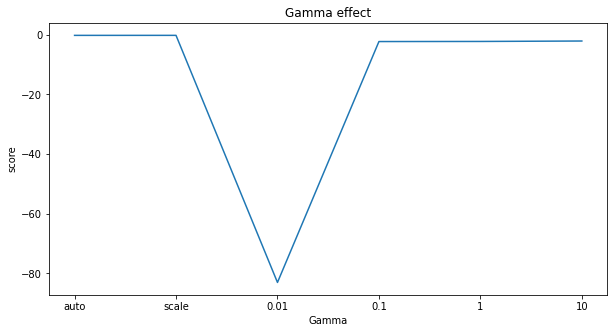

In [ ]:
gamma = ['auto','scale', .01, .1, 1, 10]

scores = []
for g in gamma:
  model.set_params(gamma=g)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(gamma, scores)
plt.title("Gamma effect")
plt.xlabel("Gamma")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={"Gamma":gamma, 'Score':scores}).sort_values('Score')

,Gamma,Score
2,0.01,-83.044220
3,0.1,-2.308919
4,1,-2.274167
5,10,-2.128889
0,auto,-0.236775
1,scale,-0.231639


In [ ]:
model = []
model = SVR(C = 1, kernel='poly', epsilon=.4, gamma = 'scale')

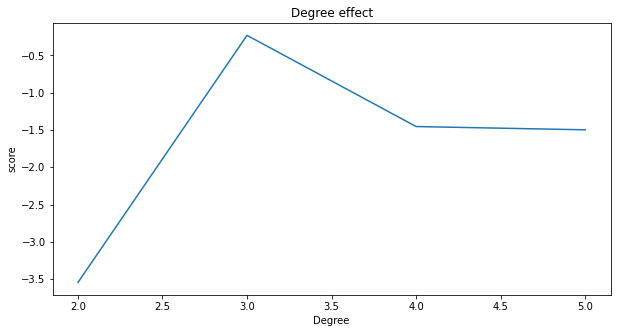

In [ ]:
degree = [2, 3, 4, 5]

scores = []
for d in degree:
  model.set_params(degree=d)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(degree, scores)
plt.title("Degree effect")
plt.xlabel("Degree")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={"degree":degree, 'score':scores}).sort_values('score')

,degree,score
0,2,-3.544705
3,5,-1.498129
2,4,-1.454373
1,3,-0.231639


##Uji##

###Uji 1###

In [ ]:
model1, model2 = [], []
model1 = SVR(C = 2.5, kernel='linear', epsilon=.1)
model2 = SVR(C = 1, kernel='poly', epsilon=.4, gamma='scale', degree=3)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [ ]:
n = []
for i in range (1,len(y_test)+1):
  n.append(i)
len(n)

5

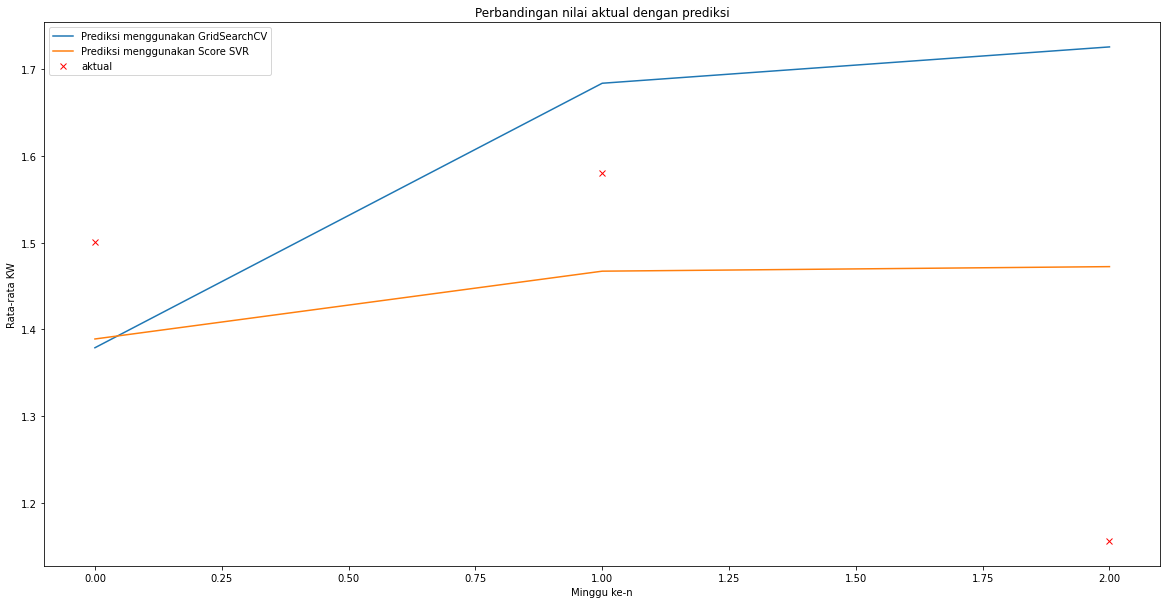

MAPE = 21.31023093083554
MSE= 0.11671100734895162
MAPE = 14.001695246122296
MSE= 0.041834308051079655


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_pred1, label='Prediksi menggunakan GridSearchCV')
plt.plot(y_pred2, label='Prediksi menggunakan Score SVR')
plt.plot(y_test, 'rx',label='aktual')
plt.legend()
plt.xlabel('Minggu ke-n')
plt.ylabel('Rata-rata KW')
plt.title('Perbandingan nilai aktual dengan prediksi')
plt.show()
print(f'MAPE = {MAPE(y_test, y_pred1)}')
print(f'MSE= {MSE(y_test, y_pred1)}')
print(f'MAPE = {MAPE(y_test, y_pred2)}')
print(f'MSE= {MSE(y_test, y_pred2)}')

In [ ]:
pd.DataFrame(data={'Aktual':y_test, 'Prediksi':y_pred})

,Aktual,Prediksi
0,1.197054,1.631661
1,1.232991,1.799501
2,1.500184,1.800516
3,1.580595,1.981913
4,1.155683,2.009965


In [ ]:
model = []
model = SVR(C = 4.5, kernel='rbf', epsilon=.1, gamma=.1)
model

SVR(C=4.5, gamma=0.1)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

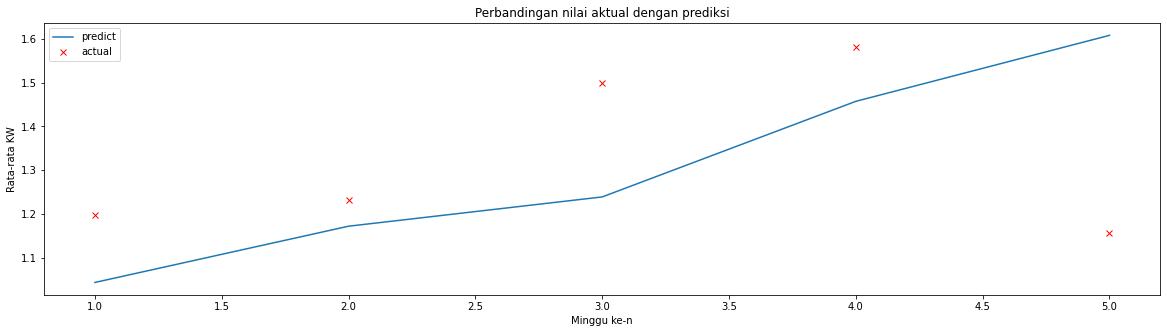

MAPE = 16.417955508182974
MSE= 0.0630514897449542


In [ ]:
plt.figure(figsize=(20,5))
plt.plot(n, y_pred, label='predict')
plt.plot(n, y_test, 'rx',label='actual')
plt.legend()
plt.xlabel('Minggu ke-n')
plt.ylabel('Rata-rata KW')
plt.title('Perbandingan nilai aktual dengan prediksi')
plt.show()
print(f'MAPE = {MAPE(y_test, y_pred)}')
print(f'MSE= {MSE(y_test, y_pred)}')

In [ ]:
pd.DataFrame(data={'Aktual':y_test, 'Prediksi':y_pred})

,Aktual,Prediksi
0,1.197054,1.043721
1,1.232991,1.172179
2,1.500184,1.239049
3,1.580595,1.457389
4,1.155683,1.608096


In [ ]:
_last_data, _pred_data, _last_date, _pred_date = [],[],[],[]
_last_data = new_data_1week[len(new_data_1week)-2:]
_pred_data = model.predict([_last_data])

In [ ]:
n1 = [4,5]
n2 = [6]
_pred_data = [
              _pred_data[0]
              ]

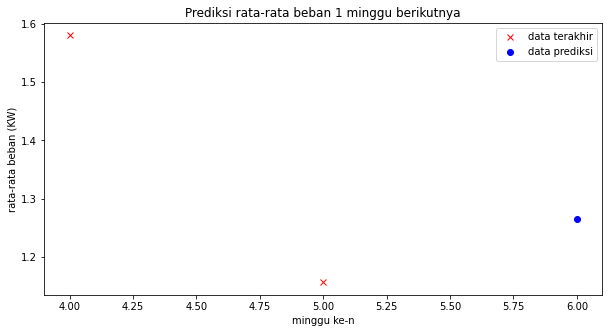

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(n1, _last_data,'rx', label='data terakhir')
plt.plot(n2, _pred_data,'bo', label='data prediksi')
plt.legend()
plt.xlabel('minggu ke-n')
plt.title('Prediksi rata-rata beban 1 minggu berikutnya')
plt.ylabel('rata-rata beban (KW)')
plt.show()

In [ ]:
_pred_data

[1.264561281617148]

In [ ]:
import pickle
# save the model to disk
filename = '1Minggu.sav'
pickle.dump(model, open(filename, 'wb'))